# Unsupervised Learning Project-Keerthana

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('vehicle-1.csv')
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Data pre-processing

In [3]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [4]:
data.describe().T


count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [5]:
data.shape


(846, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [7]:
data.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Target Variable Class - Encoding it to numerical value

In [8]:
data['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [9]:
c ={'car': 1, 'bus': 2, 'van': 3}
data['class'] =data['class'].map(c)

In [10]:
data['class'] 

0      3
1      3
2      1
3      3
4      2
      ..
841    1
842    3
843    1
844    1
845    3
Name: class, Length: 846, dtype: int64

In [11]:
data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio  class  
841             188.0            195      1  
842             186.0            197      3  
843             187.0            201      1  
844             190.0            195      1  
845             186.0            190      3

### Missing values imputation

In [12]:
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
data.columns[data.isnull().any()]

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [14]:
null_columns = list(data.columns[data.isnull().any()])

In [15]:
data[null_columns]

circularity  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0           48.0                  83.0         178.0                  72.0   
1           41.0                  84.0         141.0                  57.0   
2           50.0                 106.0         209.0                  66.0   
3           41.0                  82.0         159.0                  63.0   
4           44.0                  70.0         205.0                 103.0   
..           ...                   ...           ...                   ...   
841         39.0                  87.0         183.0                  64.0   
842         46.0                  84.0         163.0                  66.0   
843         54.0                 101.0         222.0                  67.0   
844         36.0                  78.0         146.0                  58.0   
845         36.0                  66.0         123.0                  55.0   

     scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
0            162.0           42.0                    20.0            176.0   
1            149.0           45.0                    19.0            170.0   
2            207.0           32.0                    23.0            223.0   
3            144.0           46.0                    19.0            160.0   
4            149.0           45.0                    19.0            241.0   
..             ...            ...                     ...              ...   
841          169.0           40.0                    20.0            200.0   
842          159.0           43.0                    20.0            173.0   
843          222.0           30.0                    25.0            228.0   
844          135.0           50.0                    18.0            155.0   
845          120.0           56.0                    17.0            140.0   

     scaled_variance.1  scaled_radius_of_gyration  \
0                379.0                      184.0   
1                330.0                      158.0   
2                635.0                      220.0   
3                309.0                      127.0   
4                325.0                      188.0   
..                 ...                        ...   
841              422.0                      149.0   
842              368.0                      176.0   
843              721.0                      200.0   
844              270.0                      148.0   
845              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  
0               187.0  
1               189.0  
2               188.0  
3               199.0  
4               180.0  
..                ...  
841             188.0  
842             186.0  
843             187.0  
844             190.0  
845             186.0  

[846 rows x 14 columns]

In [16]:
data.tail()

compactness  circularity  distance_circularity  radius_ratio  \
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   
843                         70.0             3.0               4.0   
844                         66.0             0.0              25.0   
845                         73.0             1.0              18.0   

     skewness_about.2  hollows_ratio  class  
841             188.0            195      1  
842             186.0            197      3  
843             187.0            201      1  
844             190.0            195      1  
845             186.0            190      3

In [17]:
from sklearn.impute import SimpleImputer


In [18]:
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
data[null_columns]=pd.DataFrame(impute.fit_transform(data[null_columns]), columns = null_columns)

In [19]:
data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [20]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    1.728132    0.818044    1.0    1.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    2.00     3.0

In [21]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      3  
1             189.0            199      3  
2             188.0            196      1  
3             199.0            207      3  
4             180.0            183      2

## Understanding the attributes

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

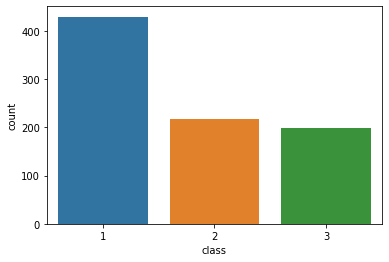

In [22]:
sns.countplot('class',data=data)

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compactness', ylabel='Density'>

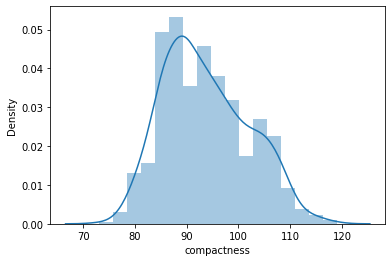

In [23]:
sns.distplot(data['compactness'])

C:\Users\Vikee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='circularity', ylabel='Density'>

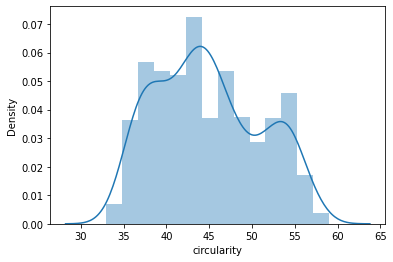

In [24]:
sns.distplot(data['circularity'])

<AxesSubplot:ylabel='class'>

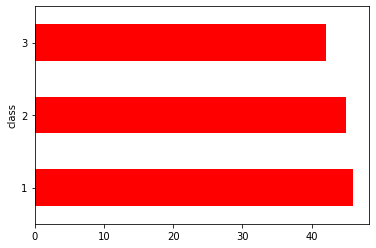

In [25]:
data.groupby('class')['circularity'].mean().plot(kind='barh',color='red')

<AxesSubplot:ylabel='class'>

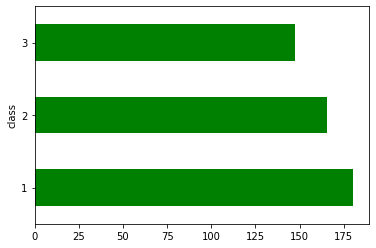

In [26]:
data.groupby('class')['radius_ratio'].mean().plot(kind='barh',color='green')

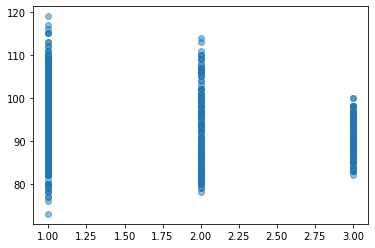

In [27]:
plt.scatter(data['class'], data['compactness'], alpha=0.5)

<AxesSubplot:>

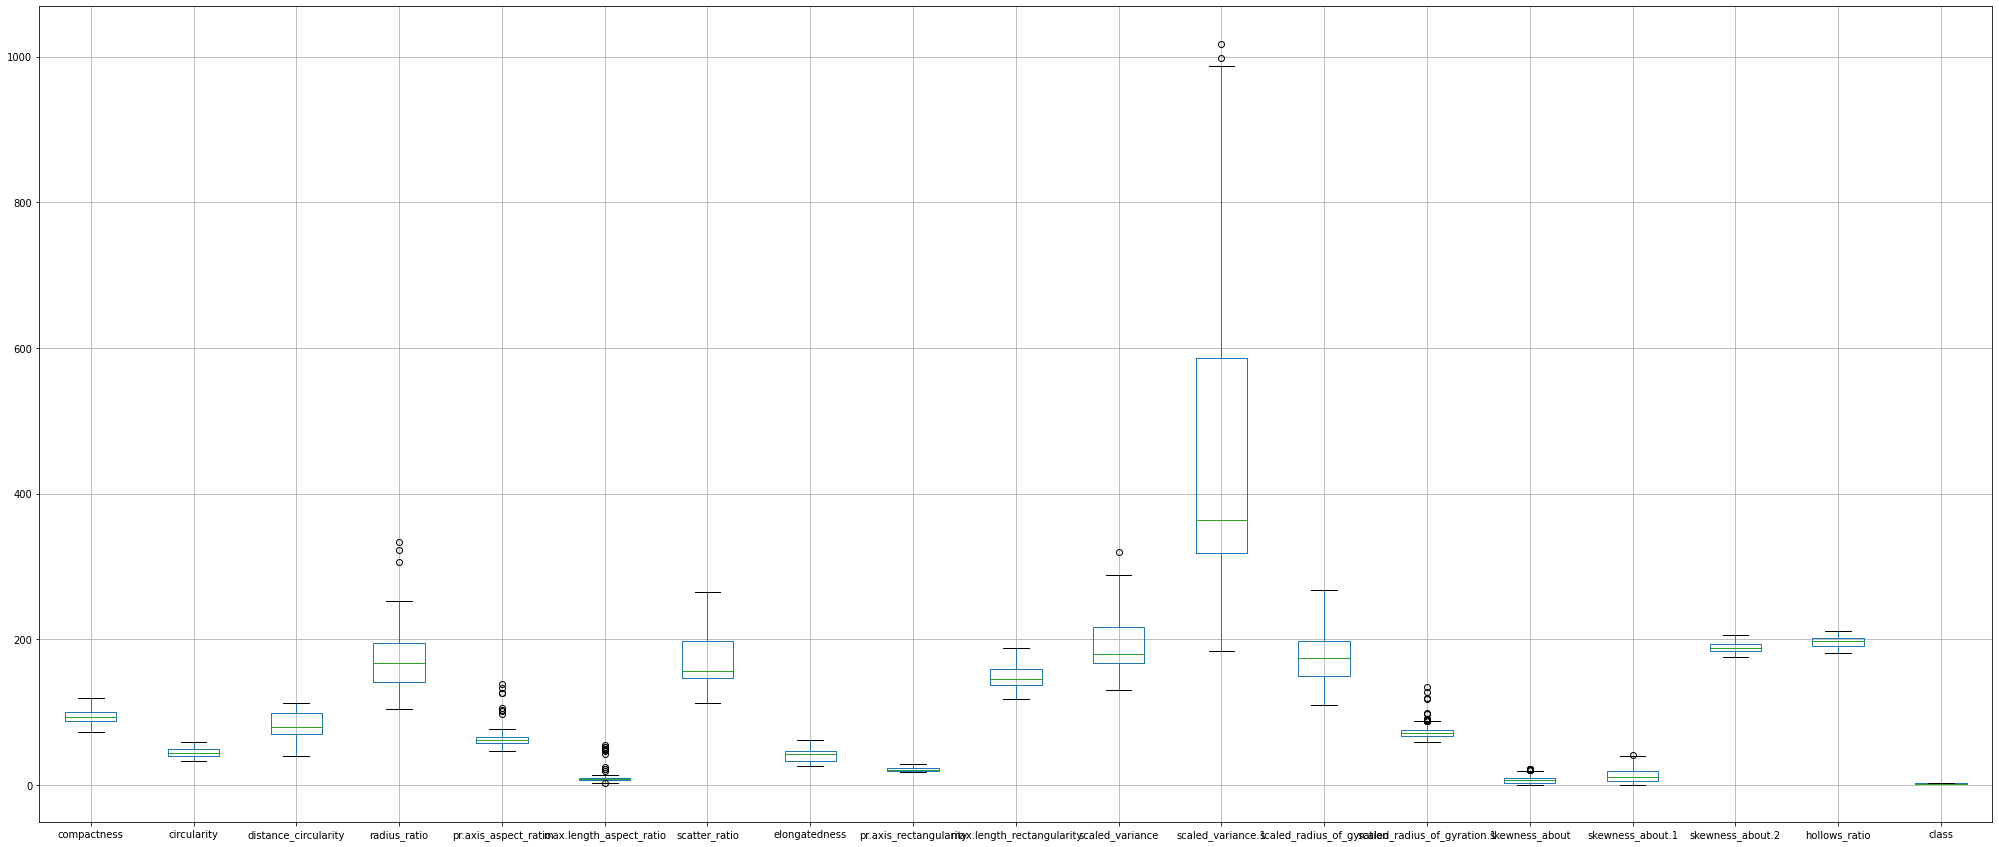

In [92]:
data.boxplot(figsize=(35,15))

<AxesSubplot:>

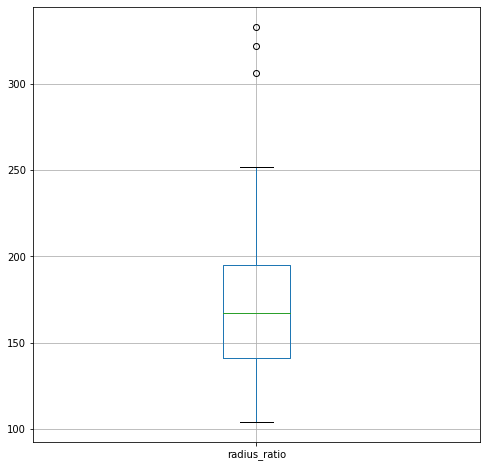

In [83]:
data.boxplot(column='radius_ratio',return_type='axes',figsize=(8,8))

<AxesSubplot:>

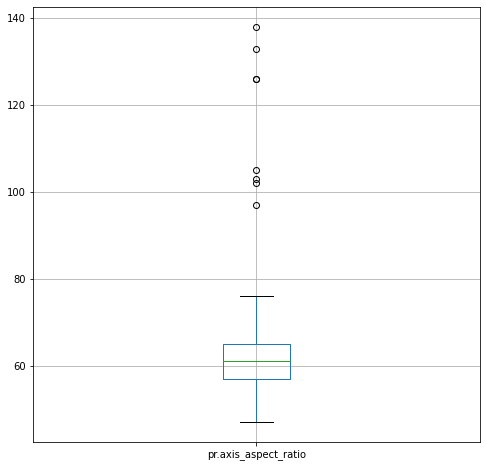

In [84]:
data.boxplot(column='pr.axis_aspect_ratio',return_type='axes',figsize=(8,8))

<AxesSubplot:>

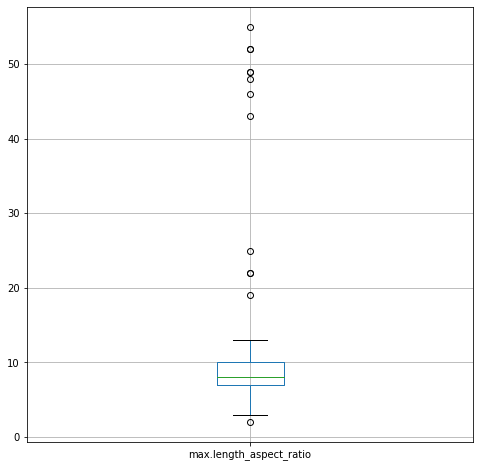

In [85]:
data.boxplot(column='max.length_aspect_ratio',return_type='axes',figsize=(8,8))

<AxesSubplot:>

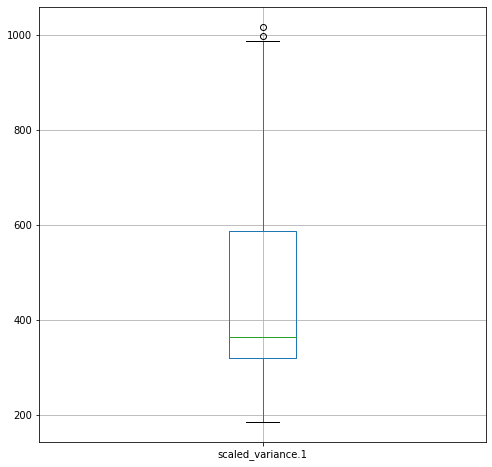

In [87]:
data.boxplot(column='scaled_variance.1',return_type='axes',figsize=(8,8))

<AxesSubplot:>

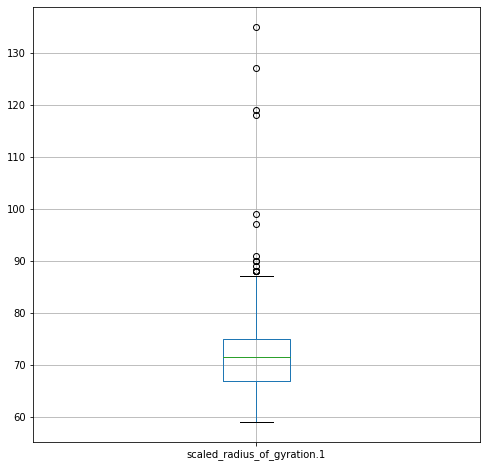

In [88]:
data.boxplot(column='scaled_radius_of_gyration.1',return_type='axes',figsize=(8,8))

### engineer outliers

In [2]:
#find the outliers and replace them by median
for cols in data.columns[:-1]:
    q1 = data[cols].quantile(0.25)
    q3 = data[cols].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    data.loc[(data[cols] < low) | (data[cols] > high),cols]= data[cols].median()

NameError: name 'data' is not defined

<AxesSubplot:>

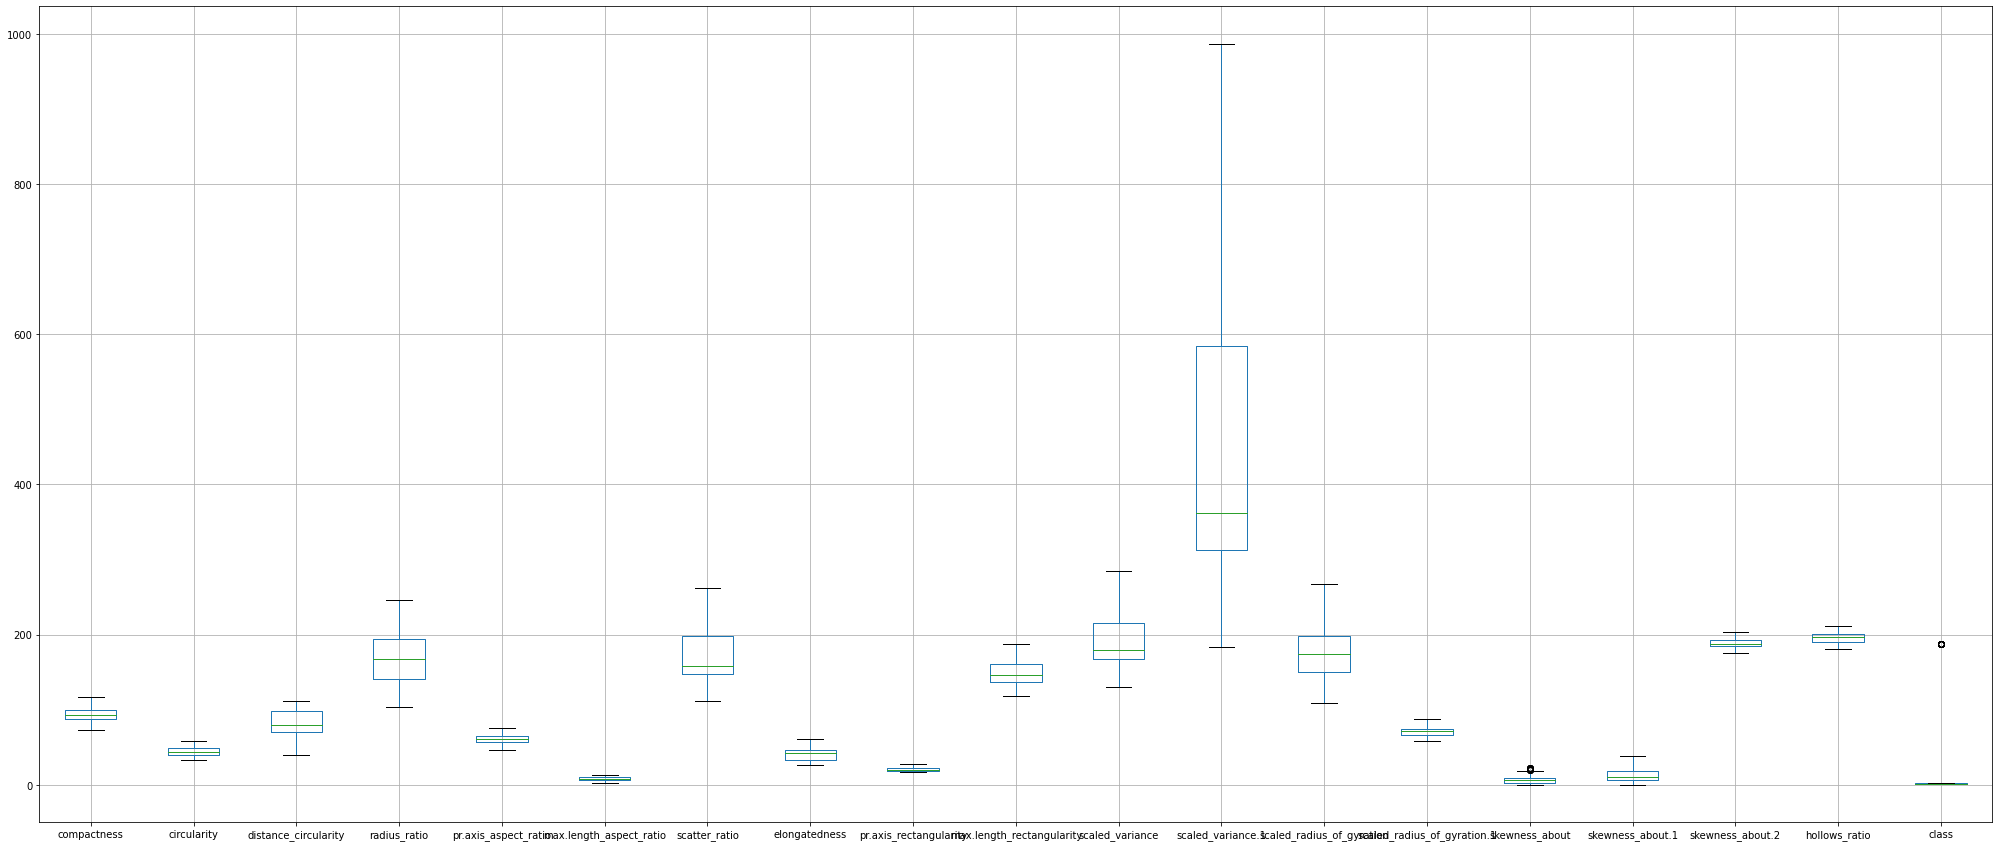

In [101]:
data.boxplot(figsize=(35,15))

In [29]:
cor=data.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.297774    -0.251281             -0.428523   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.402095              0.038686   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

In [81]:
cor1=cor.abs().unstack()
cor1 = cor1.sort_values(ascending=False)
cor1 = cor1[cor1 >= 0.9]
cor1 = cor1[cor1 < 1]
cor1

scaled_variance.1          scatter_ratio                0.993012
scatter_ratio              scaled_variance.1            0.993012
pr.axis_rectangularity     scatter_ratio                0.989751
scatter_ratio              pr.axis_rectangularity       0.989751
scaled_variance.1          pr.axis_rectangularity       0.988213
pr.axis_rectangularity     scaled_variance.1            0.988213
scatter_ratio              elongatedness                0.971601
elongatedness              scatter_ratio                0.971601
circularity                max.length_rectangularity    0.961318
max.length_rectangularity  circularity                  0.961318
elongatedness              scaled_variance.1            0.953816
scaled_variance.1          elongatedness                0.953816
elongatedness              pr.axis_rectangularity       0.948996
pr.axis_rectangularity     elongatedness                0.948996
scatter_ratio              scaled_variance              0.948662
scaled_variance          

In [82]:
cor1 = pd.DataFrame(cor1).reset_index()
cor1.columns = ['feature1', 'feature2', 'corr']
cor1.head()

feature1                feature2      corr
0       scaled_variance.1           scatter_ratio  0.993012
1           scatter_ratio       scaled_variance.1  0.993012
2  pr.axis_rectangularity           scatter_ratio  0.989751
3           scatter_ratio  pr.axis_rectangularity  0.989751
4       scaled_variance.1  pr.axis_rectangularity  0.988213

In [32]:
# correlation of independent variables with target variable
corre = []
var =data.drop(['class'],axis=1).columns

for v in var:
    corre.append(abs(data['class'].corr(data[v])))

display(pd.DataFrame([var, corre], index = ['Variable', 'ClassCorrelation']).T.\
        sort_values('ClassCorrelation', ascending = False))

Variable ClassCorrelation
7                 elongatedness         0.483027
6                 scatter_ratio         0.463566
8        pr.axis_rectangularity         0.444586
11            scaled_variance.1         0.443226
2          distance_circularity         0.428523
10              scaled_variance         0.407685
3                  radius_ratio         0.402095
0                   compactness         0.297774
15             skewness_about.1         0.271465
1                   circularity         0.251281
12    scaled_radius_of_gyration         0.247735
13  scaled_radius_of_gyration.1         0.221288
17                hollows_ratio         0.142852
9     max.length_rectangularity         0.140152
14               skewness_about        0.0928816
16             skewness_about.2        0.0547317
4          pr.axis_aspect_ratio        0.0386856
5       max.length_aspect_ratio        0.0369419

<AxesSubplot:>

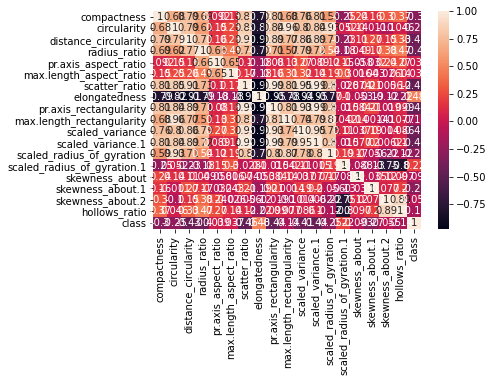

In [33]:

sns.heatmap(data.corr(),annot=True)

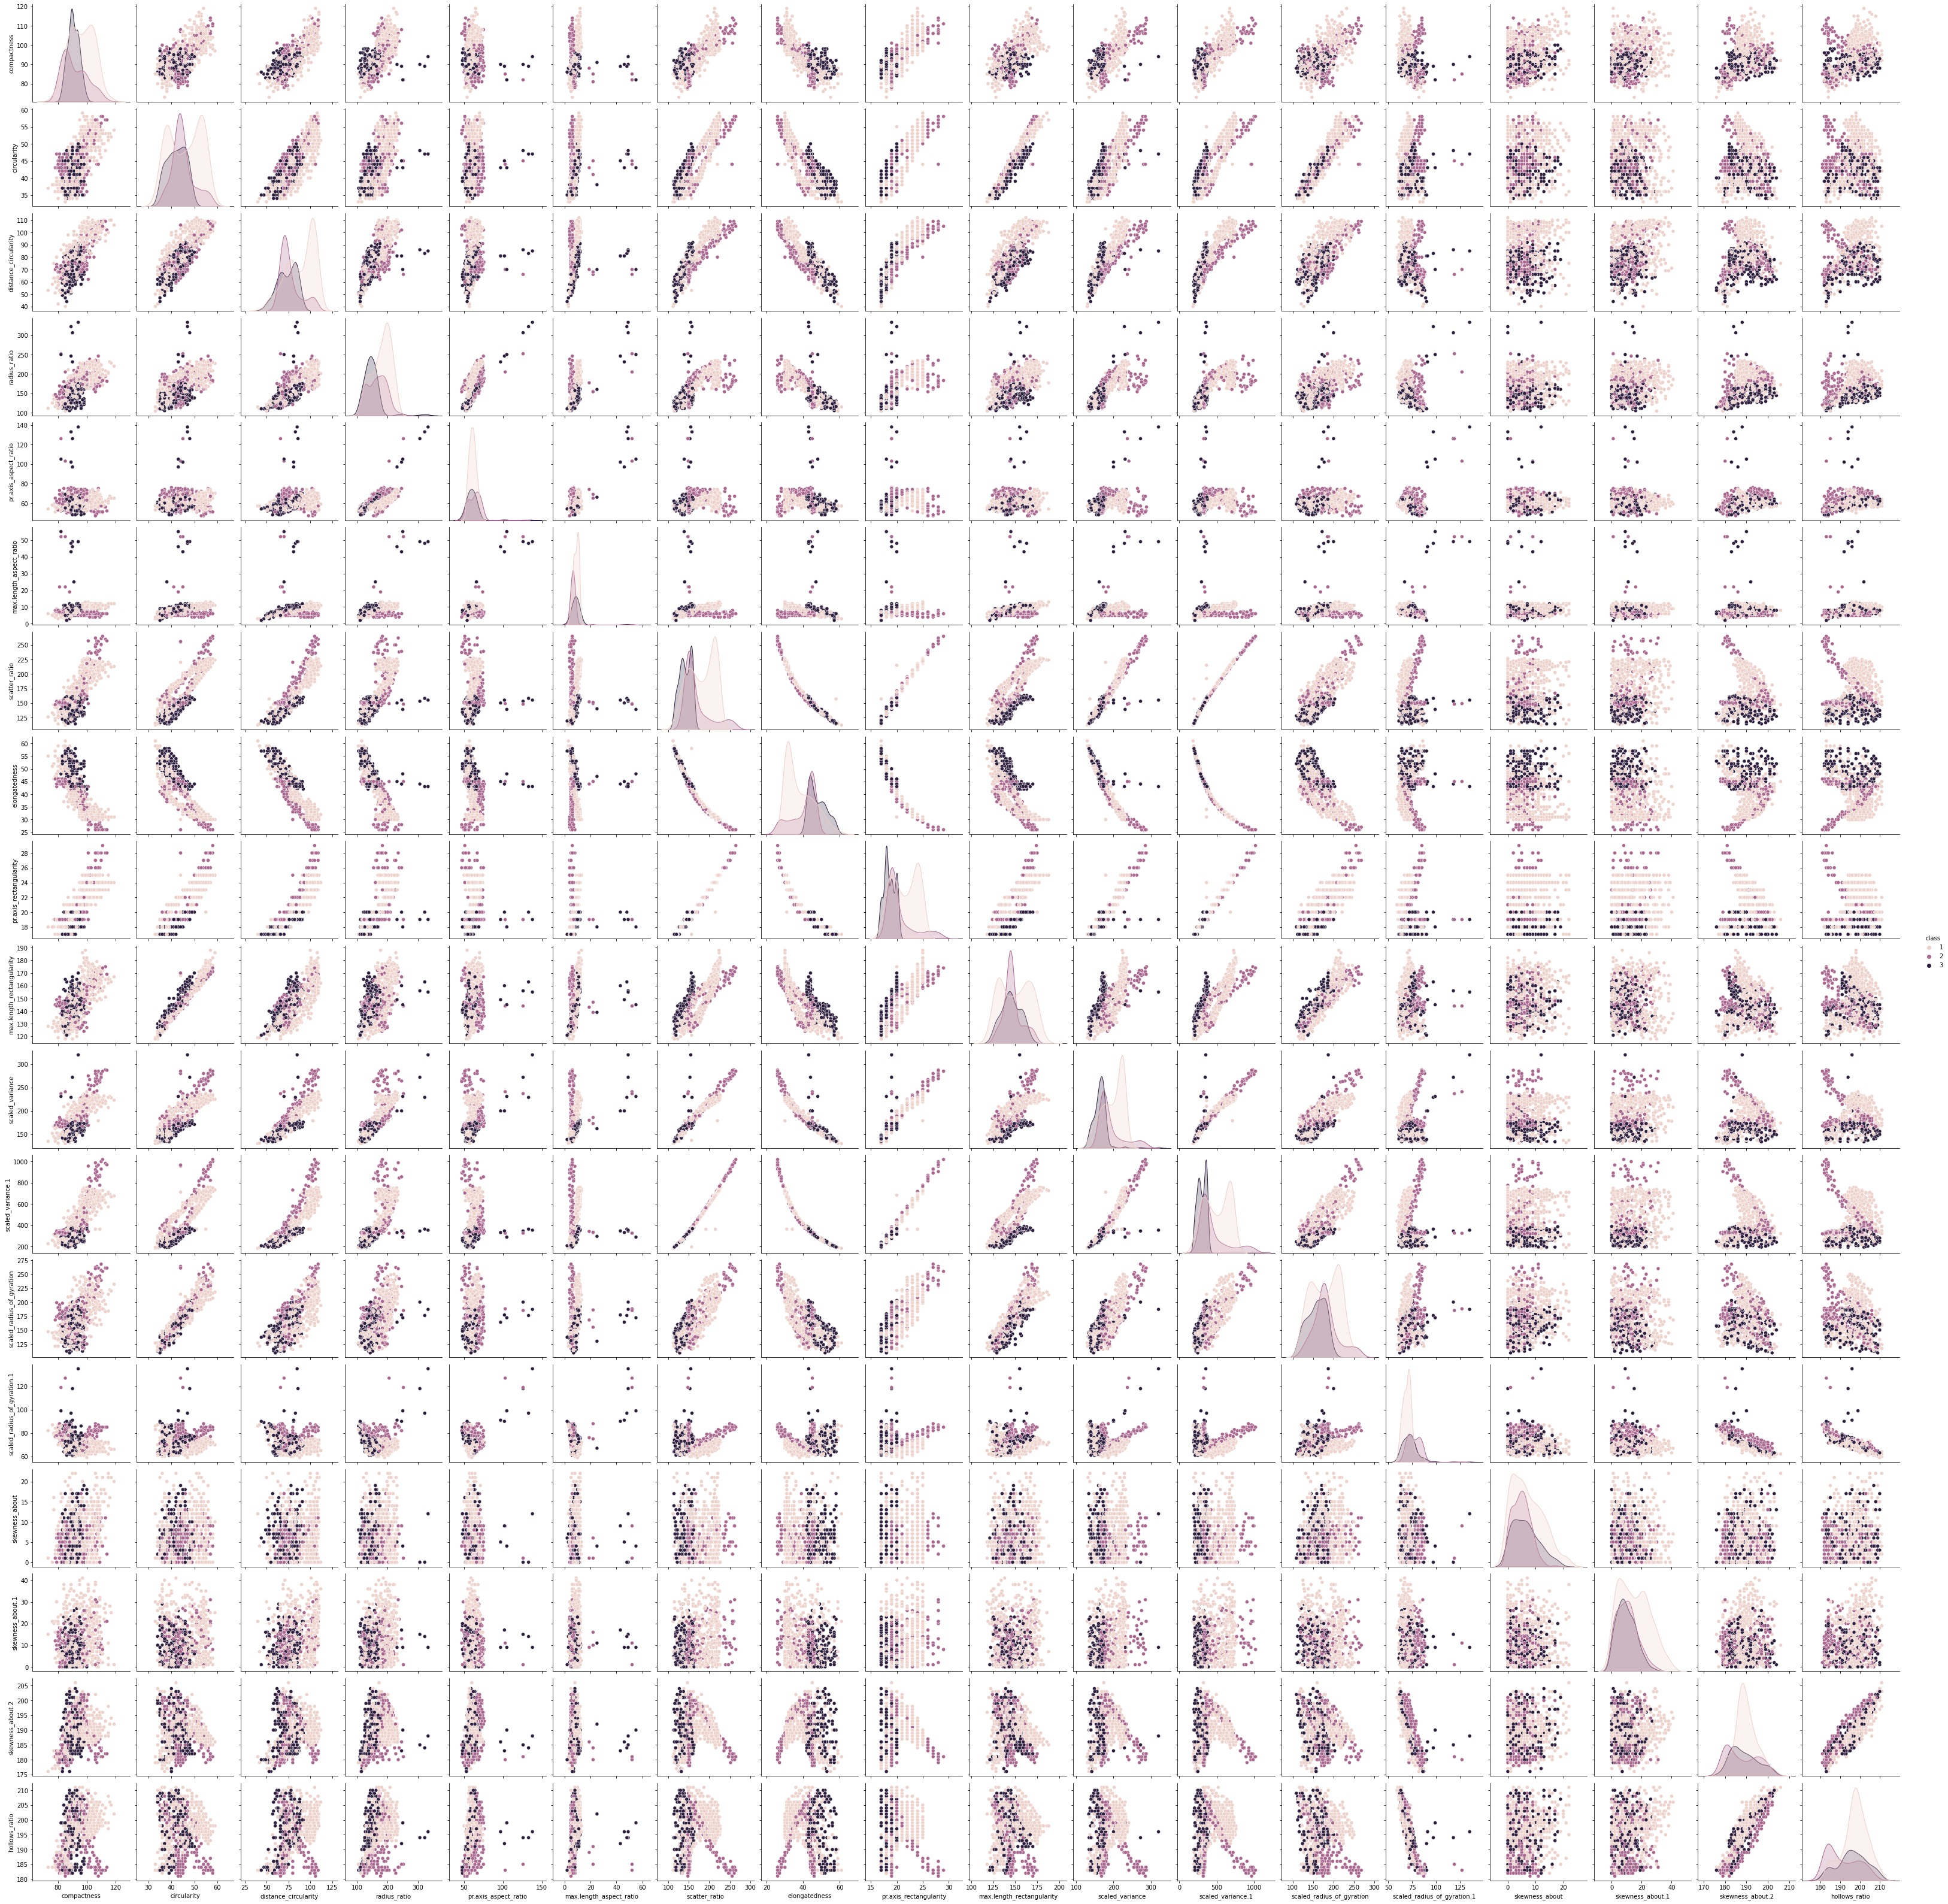

In [34]:
sns.pairplot(data, hue = "class")

In [35]:
data.skew(axis=0,skipna=True)

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.537826
dtype: float64

In [91]:
data.T.duplicated().sum()  # duplicated variables

0

In [102]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [104]:
mi = mutual_info_classif(X, y)
mi

array([0.21039755, 0.20557492, 0.39790798, 0.31249411, 0.11290358,
       0.25315579, 0.46193639, 0.41927893, 0.37315493, 0.25602055,
       0.45868785, 0.49058583, 0.27391278, 0.15398591, 0.09702002,
       0.11608106, 0.18786184, 0.15560915])

In [105]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)

scaled_variance.1              0.490586
scatter_ratio                  0.461936
scaled_variance                0.458688
elongatedness                  0.419279
distance_circularity           0.397908
pr.axis_rectangularity         0.373155
radius_ratio                   0.312494
scaled_radius_of_gyration      0.273913
max.length_rectangularity      0.256021
max.length_aspect_ratio        0.253156
compactness                    0.210398
circularity                    0.205575
skewness_about.2               0.187862
hollows_ratio                  0.155609
scaled_radius_of_gyration.1    0.153986
skewness_about.1               0.116081
pr.axis_aspect_ratio           0.112904
skewness_about                 0.097020
dtype: float64

In [106]:
# select the top 10 features
best = SelectKBest(mutual_info_classif, k=10).fit(X.fillna(0), y)

In [107]:
# top 10 features

X.columns[best.get_support()]

Index(['compactness', 'distance_circularity', 'radius_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'],
      dtype='object')

### Observations :

1) Among the three vehicles, there are more cars than bus and vans.

2) the below independent variables are highly correlated:

scaled_variance.1   and 	scatter_ratio	        0.993012

scatter_ratio	     and    scaled_variance.1	0.993012

pr.axis_rectangularity	and scatter_ratio	         0.989751

scatter_ratio	    and     pr.axis_rectangularity	0.989751

scaled_variance.1	and pr.axis_rectangularity	0.988213

3) the below variables had outliers:

radius_ratio

pr.axis_aspect_ratio

max.length_aspect_ratio

scaled_variance.1

scaled_radius_of_gyration.1

4) the outliers are identified and removed by replacing them with median value

5) There are no duplicate features

6) from the mutual information feature selection method, we see that the below features contribute the most to predicting the target:

scaled_variance.1              0.490586

scatter_ratio                  0.461936

scaled_variance                0.458688

elongatedness                  0.419279

distance_circularity           0.397908

pr.axis_rectangularity         0.373155

radius_ratio                   0.312494


7) the below variables are normally distributed :

distance_circularity 

elongatedness  

max.length_rectangularity

skewness_about.2

circularity


# Split the data into train and test 

In [103]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [38]:
X.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [39]:
y.head()

0    3
1    3
2    1
3    3
4    2
Name: class, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Model Building

# Support vector machine

In [41]:
from sklearn.svm import SVC


In [42]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [43]:
#Predicting the Test Set
y_pred= classifier.predict(X_test)

In [44]:
train_acc=classifier.score(X_train, y_train)
test_acc=classifier.score(X_test , y_test)
print('Accuracy on Training data: ',classifier.score(X_train, y_train))
print('Accuracy on Testing data: ', classifier.score(X_test , y_test))

Accuracy on Training data:  0.6081081081081081
Accuracy on Testing data:  0.5551181102362205


In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[100   0  25]
 [ 59   5   7]
 [ 22   0  36]]


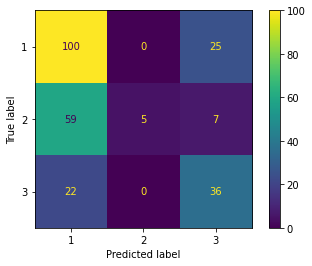

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [48]:
print('\nTrue Positive for 1 Car   = ', confusion_matrix[0][0])
print('no of predictions of car incorrectly classified as bus   = ',   confusion_matrix[0][1])
print('no of predictions of car incorrectly classified as van   = ',   confusion_matrix[0][2])
print('no of predictions of bus incorrectly classified as car    = ',   confusion_matrix[1][0])
print('True Positive for 2 Bus    = ',   confusion_matrix[1][1])
print('no of predictions of bus incorrectly classified as van  = ',   confusion_matrix[1][2])
print('no of predictions of van incorrectly classified as car    = ',   confusion_matrix[2][0])
print('no of predictions of van incorrectly classified as bus    = ',   confusion_matrix[2][1])
print('True Positive for 3 Van    = ',   confusion_matrix[2][2])


True Positive for 1 Car   =  100
no of predictions of car incorrectly classified as bus   =  0
no of predictions of car incorrectly classified as van   =  25
no of predictions of bus incorrectly classified as car    =  59
True Positive for 2 Bus    =  5
no of predictions of bus incorrectly classified as van  =  7
no of predictions of van incorrectly classified as car    =  22
no of predictions of van incorrectly classified as bus    =  0
True Positive for 3 Van    =  36


# K-fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [50]:
s_scores = cross_val_score(SVC(), X_train,y_train,cv=10)
s_scores

array([0.55      , 0.63333333, 0.54237288, 0.55932203, 0.61016949,
       0.62711864, 0.6440678 , 0.62711864, 0.59322034, 0.55932203])

In [51]:
traincvscore=np.average(s_scores)

In [52]:
s_scores1 = cross_val_score(SVC(), X_test,y_test,cv=10)
s_scores1

array([0.57692308, 0.46153846, 0.53846154, 0.57692308, 0.52      ,
       0.44      , 0.52      , 0.6       , 0.64      , 0.48      ])

In [53]:
testcvscore=np.average(s_scores1)
testcvscore

0.5353846153846152

# PCA

In [54]:
from sklearn.decomposition import PCA

In [55]:
from scipy.stats import zscore


In [56]:
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [57]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [58]:
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(n_components=18)

In [59]:
eigen_values =pca.explained_variance_
eigen_values

array([9.40460261e+00, 3.01492206e+00, 1.90352502e+00, 1.17993747e+00,
       9.17260633e-01, 5.39992629e-01, 3.58870118e-01, 2.21932456e-01,
       1.60608597e-01, 9.18572234e-02, 6.64994118e-02, 4.66005994e-02,
       3.57947189e-02, 2.74120657e-02, 2.05792871e-02, 1.79166314e-02,
       1.00257898e-02, 2.96445743e-03])

In [60]:
eigen_vectors=pca.components_
eigen_vectors

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [61]:
print(pca.explained_variance_ratio_) # percentage of variation explained by each eigen Vector

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


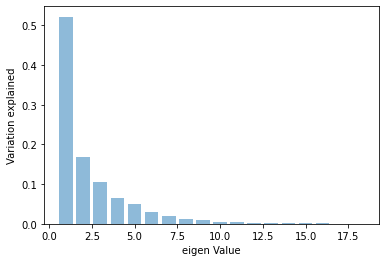

In [62]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [63]:
# let us try with 10 components


In [64]:
pca1 = PCA(n_components=10)
pca1.fit(XScaled)
print(pca1.explained_variance_) 
print(pca1.explained_variance_ratio_) 

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]
[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


In [65]:
pca1.components_

array([[ 2.75283688e-01,  2.93258469e-01,  3.04609128e-01,
         2.67606877e-01,  8.05039890e-02,  9.72756855e-02,
         3.17092750e-01, -3.14133155e-01,  3.13959064e-01,
         2.82830900e-01,  3.09280359e-01,  3.13788457e-01,
         2.72047492e-01, -2.08137692e-02,  4.14555082e-02,
         5.82250207e-02,  3.02795063e-02,  7.41453913e-02],
       [-1.26953763e-01,  1.25576727e-01, -7.29516436e-02,
        -1.89634378e-01, -1.22174860e-01,  1.07482875e-02,
         4.81181371e-02,  1.27498515e-02,  5.99352482e-02,
         1.16220532e-01,  6.22806229e-02,  5.37843596e-02,
         2.09233172e-01,  4.88525148e-01, -5.50899716e-02,
        -1.24085090e-01, -5.40914775e-01, -5.40354258e-01],
       [-1.19922479e-01, -2.48205467e-02, -5.60143254e-02,
         2.75074211e-01,  6.42012966e-01,  5.91801304e-01,
        -9.76283108e-02,  5.76484384e-02, -1.09512416e-01,
        -1.70641987e-02,  5.63239801e-02, -1.08840729e-01,
        -3.14636493e-02,  2.86277015e-01, -1.15679354e

In [66]:
Xpca= pca1.transform(XScaled)

In [67]:
Xpca

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00, ...,
        -3.81106357e-01, -8.66309530e-01,  9.15114442e-02],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01, ...,
         2.47058909e-01,  1.47249715e-01, -9.37944293e-02],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02, ...,
         4.82771767e-01, -3.10832555e-01, -4.67615341e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01, ...,
         1.10477865e-01, -6.52536352e-01,  5.56591558e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01, ...,
         3.20621635e-01, -2.01263247e-01, -8.74536682e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01, ...,
        -2.48034955e-01, -4.29903644e-01, -2.99232676e-01]])

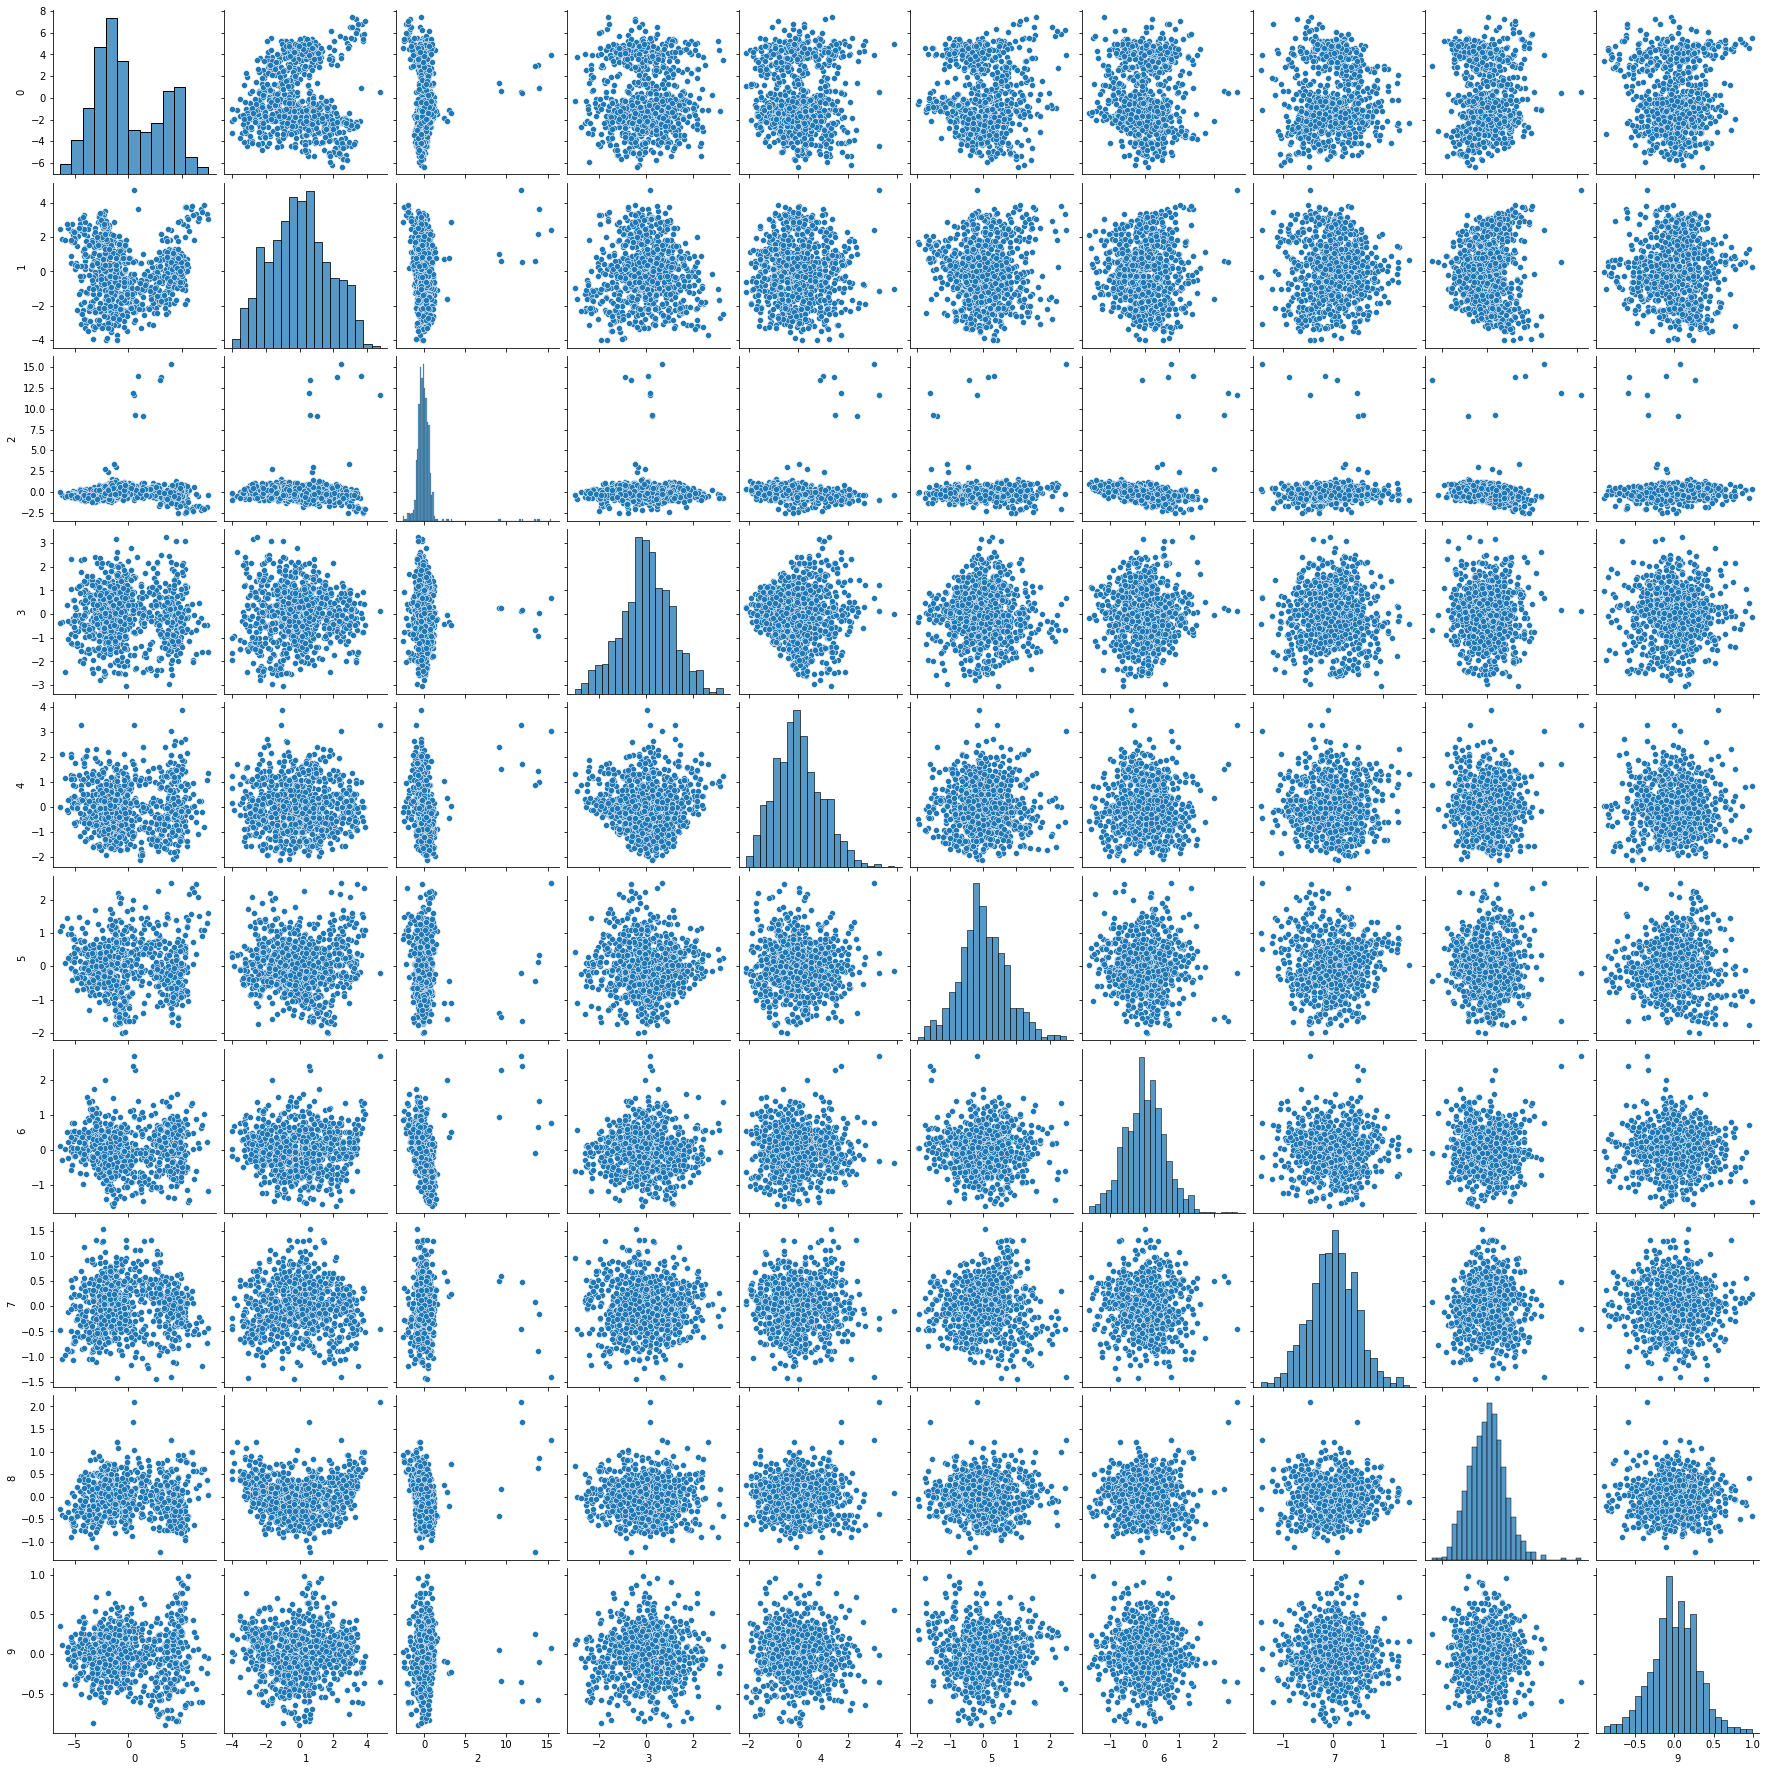

In [68]:
sns.pairplot(pd.DataFrame(Xpca))

# SVM using PCA results

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, test_size = 0.3, random_state = 10)

In [70]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(Xpca, y)

SVC(random_state=0)

In [71]:
#Predicting the Test Set
y_pred= classifier.predict(X_test)

In [72]:
classifier.score(Xpca, y)

0.9763593380614657

In [73]:
trainacc_pca=classifier.score(X_train, y_train)
testacc_pca=classifier.score(X_train, y_train)
print('Accuracy on Training data: ',classifier.score(X_train, y_train))
print('Accuracy on Testing data: ', classifier.score(X_test , y_test))

Accuracy on Training data:  0.9746621621621622
Accuracy on Testing data:  0.9803149606299213


### Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [75]:
s_scores = cross_val_score(SVC(), Xpca,y,cv=10)
s_scores

array([0.94117647, 0.95294118, 0.94117647, 0.96470588, 0.96470588,
       0.96470588, 0.91666667, 0.96428571, 0.95238095, 0.96428571])

In [76]:
cvscorepca=np.average(s_scores)

# Comparison of accuracy score and cross validataion score

In [78]:
print('Accuracy on Training data with raw data: ',train_acc)
print('Accuracy on Testing data with raw data: ', test_acc)
print('Accuracy on Testing data after applying PCA: ', testacc_pca)
print('cross validation scores without PCA: ',testcvscore)
print('cross validation scores after PCA:: ', cvscorepca)

Accuracy on Training data with raw data:  0.6081081081081081
Accuracy on Testing data with raw data:  0.5551181102362205
Accuracy on Testing data after applying PCA:  0.9746621621621622
cross validation scores without PCA:  0.5353846153846152
cross validation scores after PCA::  0.9527030812324929


# Conclusion :

We have inferred that the PCA is a dimentionality reduction technique that reduces the number of dimensions and we see that the accuracy of the dataset increases after applying PCA by reducing the number of dimensions. 

Few features contribute more in predicting the target class whereas few doesn't. 

Thus PCA helps in reducing the dimensions and improves performance.